# Model Test

In [5]:
import SimpleCNN as cnn
import torch
from torchvision import datasets, transforms
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
%cd C:\\Users\\Tony\\Documents\\TEC\\IA2\\Vakas
model = cnn.SimpleCNN()
model.load_state_dict(torch.load('Modelos/model_acc_95.94.pth'))

C:\Users\Tony\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\Tony\Documents\TEC\IA2\Vakas


C:\Users\Tony\AppData\Local\Temp\ipykernel_15776\2706354526.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('Modelos/model_acc_95.94.pth

<All keys matched successfully>

In [7]:
transform = transforms.Compose(
    [
        transforms.Resize((950, 450)),  # Resize the images
        transforms.RandomHorizontalFlip(
            p=0.5
        ),  # Apply horizontal flip with a 50% chance
        transforms.RandomVerticalFlip(
            p=0.5
        ),  # Apply vertical flip with a 50% chance (optional)
        transforms.RandomRotation(
            degrees=30
        ),  # Randomly rotate the image by up to 30 degrees
        transforms.RandomAffine(
            degrees=0, scale=(0.5, 1.0)
        ),  # Emulate camera zooming out , scale=(0.5, 1.0) 50% to 100%
        transforms.ColorJitter(saturation=2),  # Saturate the color of the images
        transforms.ToTensor(),  # Convert image to tensor
        transforms.Normalize(
            mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]
        ),  # Normalize the values
    ]
)
# Load the test dataset
test_dataset = datasets.ImageFolder(root='C:\\Users\\Tony\\Documents\\TEC\\IA2\\Vakas\\dataset_split\\test', transform=transform)

# Create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

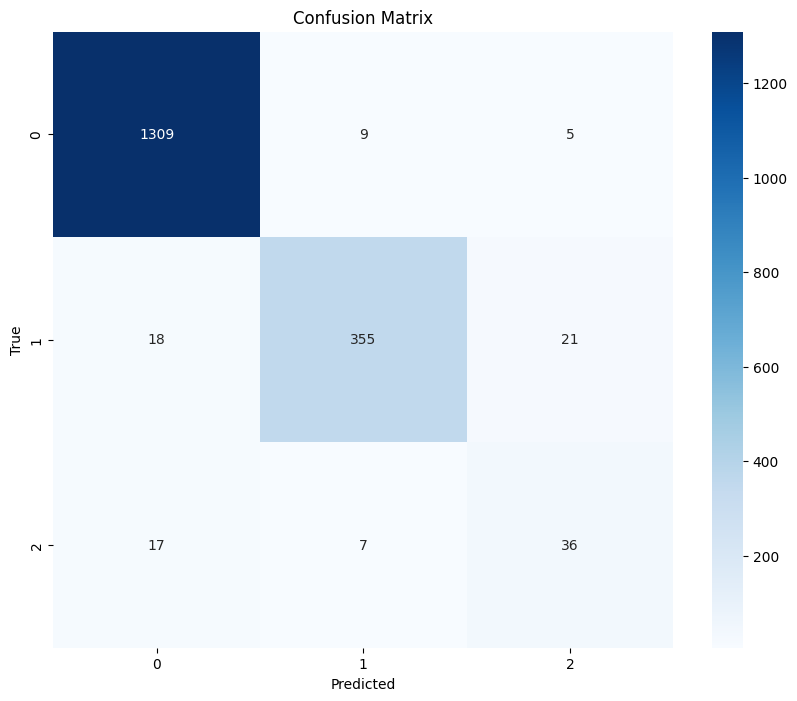

In [8]:
# Set the model to evaluation mode
model.eval()

# Initialize lists to store true labels and predictions
true_labels = []
predictions = []

# Disable gradient calculation for inference
with torch.no_grad():
    for images, labels in test_loader:
        # Move images and labels to the device (CPU or GPU)
        images, labels = images.to('cpu'), labels.to('cpu')
        
        # Forward pass to get outputs
        outputs = model(images)
        
        # Get the predicted class with the highest score
        _, predicted = torch.max(outputs, 1)
        
        # Append true labels and predictions to the lists
        true_labels.extend(labels.numpy())
        predictions.extend(predicted.numpy())

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()